## The key features of TensorFlow

### Creating a graph in TensorFlow v1.x

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

2023-08-13 18:58:31.096066: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 18:58:31.174863: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-13 18:58:31.175870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-13 18:58:32.671159: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
## TF v1.x style
g = tf.Graph()

with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2 * (a - b) + c

In [3]:
## TF v1.x style
with tf.compat.v1.Session(graph=g) as sess: # creating an environment
    print('Result: z =', sess.run(z))

Result: z = 1


2023-08-13 18:58:35.018588: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-08-13 18:58:35.023483: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled


### Migrating a graph to TensorFlow v2

In [4]:
## TF v2 style
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')
z = 2 * (a - b) + c
tf.print('Result: z =', z)

Result: z = 1


### Loading input data into a model: TensorFlow v1.x style

In [5]:
## TF-v1.x style
g = tf.Graph()

with g.as_default():
    a = tf.compat.v1.placeholder(shape=None,
                                 dtype=tf.int32, name='tf_a')
    b = tf.compat.v1.placeholder(shape=None,
                                 dtype=tf.int32, name='tf_b')
    c = tf.compat.v1.placeholder(shape=None,
                                 dtype=tf.int32, name='tf_c')
    z = 2 * (a - b) + c
    
with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a:1, b:2, c:3}
    print('Result: z =', sess.run(z, feed_dict=feed_dict))

Result: z = 1


### Loading input data into a model: TensorFlow v2 style

In [6]:
## TF-v2 style
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

In [7]:
tf.print('Scalar Inputs:', compute_z(1, 2, 3))
tf.print('Rank 1 Inputs:', compute_z([1], [2], [3]))
tf.print('Rank 2 Inputs:', compute_z([[1]], [[2]], [[3]]))

Scalar Inputs: 1
Rank 1 Inputs: [1]
Rank 2 Inputs: [[1]]


### Improving computational performance with function decorators

In [8]:
@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

In [9]:
tf.print('Scalar Inputs:', compute_z(1, 2, 3))
tf.print('Rank 1 Inputs:', compute_z([1], [2], [3]))
tf.print('Rank 2 Inputs:', compute_z([[1]], [[2]], [[3]]))

Scalar Inputs: 1
Rank 1 Inputs: [1]
Rank 2 Inputs: [[1]]


In [10]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None],
                                            dtype=tf.int32),
                              tf.TensorSpec(shape=[None],
                                            dtype=tf.int32),
                              tf.TensorSpec(shape=[None],
                                            dtype=tf.int32)))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

In [11]:
tf.print('Rank 1 Inputs:', compute_z([1], [2], [3]))
tf.print('Rank 1 Inputs:', compute_z([1, 2], [2, 4], [3, 6]))

Rank 1 Inputs: [1]
Rank 1 Inputs: [1 2]


Calling this function using tensors with ranks other than 1 will result in
an error since the rank will not match the specified input signature:

```python
## we expect this to result in an error
tf.print('Rank 2 Inputs:', compute_z([[1], [2]], [[2], [4]], [[3], [6]]))


## >> Error:
#ValueError: Python inputs incompatible with input_signature: 
#inputs (([[1], [2]], [[2], [4]], [[3], [6]])), input_signature 
#((TensorSpec(shape=(None,), dtype=tf.int32, name=None), 
#  TensorSpec(shape=(None,), dtype=tf.int32, name=None), 
#  TensorSpec(shape=(None,), dtype=tf.int32, name=None)))
```

In [12]:
tf.TensorSpec(shape=[None], dtype=tf.int32)

TensorSpec(shape=(None,), dtype=tf.int32, name=None)

## TensorFlow Variable objects for storing and updating model parameters

In [13]:
a = tf.Variable(initial_value=3.14, name='var_a')
print(a)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>


In [14]:
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
print(b)

<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>


In [15]:
c = tf.Variable(initial_value=[True, False], dtype=tf.bool)
print(c)

<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>


In [16]:
d = tf.Variable(initial_value=['abc'], dtype=tf.string)
print(d)

<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


In [17]:
w = tf.Variable([1, 2, 3], trainable=False)
print(w.trainable)

False


In [18]:
print(w.assign([3, 1, 4], read_value=True))

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>


In [19]:
w.assign_add([2, -1, 2], read_value=False)
print(w.value())

tf.Tensor([5 0 6], shape=(3,), dtype=int32)


In [20]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()
tf.print(init(shape=(3,)))

[-0.509050846 0.186290473 0.0399860106]


In [21]:
v = tf.Variable(init(shape=(2, 3)))
tf.print(v)

[[-0.557637274 0.204070985 0.0438024811]
 [0.386873513 -0.865251899 0.753689349]]


/home/sann-htet/anaconda3/envs/tensorflow/lib/python3.11/site-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [22]:
class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2, 3)), trainable=True)
        self.w2 = tf.Variable(init(shape=(1, 2)), trainable=False)

In [23]:
m = MyModule()
print('All module variables:', [v.shape for v in m.variables])

All module variables: [TensorShape([2, 3]), TensorShape([1, 2])]


In [24]:
print('Trainable variable:', [v.shape for v in m.trainable_variables])

Trainable variable: [TensorShape([2, 3])]


#### Variables with tf.function

```python

## this will produce an error
## ==> you cannot create a varibale inside a
##     decorated function

@tf.function
def f(x):
    w = tf.Variable([1, 2, 3])

f([1])

## ==> results in error
## ValueError: tf.function-decorated function tried to create variables on non-first call.

```

In [25]:
w = tf.Variable(tf.random.uniform((3, 3)))
@tf.function
def compute_z(x):
    return tf.matmul(w, x)

In [26]:
x = tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

[[3.8610158]
 [2.94593048]
 [3.82629013]]


## Computing gradients via automatic differentiation and GradientTape

### Computing the gradients of the loss with respect to trainable variables

In [27]:
w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

True True


In [28]:
x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
    
dloss_dw = tape.gradient(loss, w)
tf.print('dL/dw:', dloss_dw)

dL/dw: -0.559999764


In [29]:
# verifying the computed gradient
tf.print(2*x*(w*x+b-y))

[-0.559999764]


### Computing gradients with respect to non-trainable tensors

 Monitoring the non-trainable tensors via `tape.watch()`

In [30]:
with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
    
dloss_dx = tape.gradient(loss, x)
tf.print('dL/dx:', dloss_dx)

dL/dx: [-0.399999857]


### Keeping resources for multiple gradient computations 

via `persistent=True`

In [31]:
with tf.GradientTape(persistent=True) as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))
    
dloss_dw = tape.gradient(loss, w)
dloss_db = tape.gradient(loss, b)

In [32]:
tf.print('dL/dw:', dloss_dw)
tf.print('dL/db:', dloss_db)

dL/dw: -0.559999764
dL/db: -0.399999857


#### Updating variables: `optimizer.apply_gradients()`

In [33]:
optimizer = tf.keras.optimizers.SGD()
optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [34]:
tf.print('Updated w:', w)
tf.print('Updated bias:', b)

Updated w: 1.0056
Updated bias: 0.504


## Simplifying implementations of common architectures via the Keras API

In [35]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

In [36]:
## late variable creation
model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                                 
Total params: 624 (2.44 KB)
Trainable params: 624 (2.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
## printing variables of the model
for v in model.variables:
    print('{:20s}'.format(v.name), v.trainable, v.shape)

dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


#### Configuring layers

 * Keras Initializers `tf.keras.initializers`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/initializers  
 * Keras Regularizers `tf.keras.regularizers`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/regularizers  
 * Activations `tf.keras.activations`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/activations  

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16,
                                activation=tf.keras.activations.relu,
                                kernel_initializer=tf.keras.initializers.glorot_uniform(),
                                bias_initializer=tf.keras.initializers.Constant(2.0)))
model.add(tf.keras.layers.Dense(units=32,
                                activation=tf.keras.activations.sigmoid,
                                kernel_regularizer=tf.keras.regularizers.l1))

In [39]:
model.build(input_shape=(None, 4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                80        
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
Total params: 624 (2.44 KB)
Trainable params: 624 (2.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### Compiling a model

 * Keras Optimizers `tf.keras.optimizers`:  https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/optimizers
 * Keras Loss Functins `tf.keras.losses`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses
 * Keras Metrics `tf.keras.metrics`: https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/metrics

In [40]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy(), 
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall(),])

## Solving an XOR classification problem

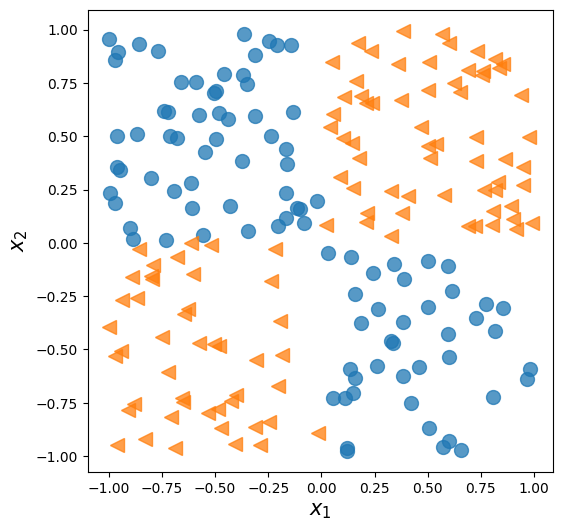

In [41]:
tf.random.set_seed(1)
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
plt.show()

In [42]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, 
                                input_shape=(2,), 
                                activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [44]:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

/tmp/ipykernel_59766/385804224.py:19: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 30s 1ms/step


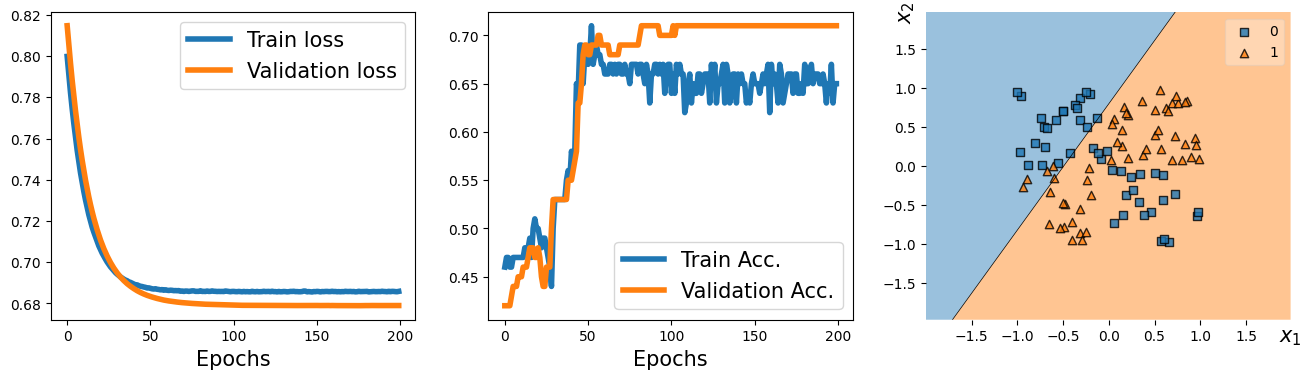

In [45]:
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

In [46]:
tf.random.set_seed(1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

## compile:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## train:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

history = hist.history

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 4)                 12        
                                                                 
 dense_6 (Dense)             (None, 4)                 20        
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 57 (228.00 Byte)
Trainable params: 57 (228.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


    1/20000 [..............................] - ETA: 37:30

/tmp/ipykernel_59766/4096805406.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),


20000/20000 [==============================] - 33s 2ms/step


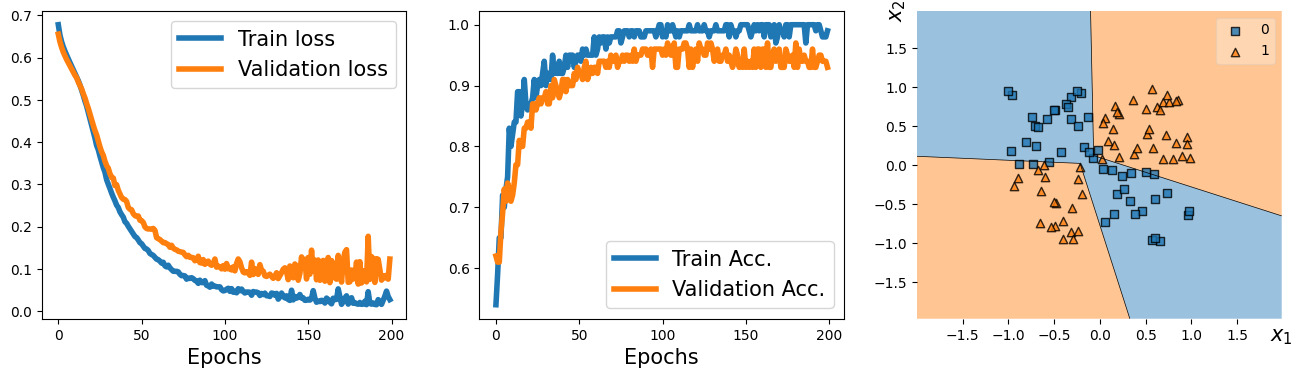

In [47]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## Making model building more flexible with Keras' functional API